In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

from imblearn.over_sampling import SMOTE

In [4]:
# loading datasets
actives = pd.read_csv('../../mold2_descriptors/2242_actives.csv')
inactives = pd.read_csv('../../mold2_descriptors/2242_inactives.csv')

In [5]:
print('actives:', len(actives))
print('inactives:', len(inactives))

actives: 715
inactives: 183379


In [6]:
# spliting datasets into test - train & validation
actives_test = actives.sample(n=300, random_state=42)
actives_train = actives.drop(actives_test.index)
inactives_test = inactives.sample(n=300, random_state=42)
inactives_train = inactives.drop(inactives_test.index)

In [8]:
df = pd.concat([actives_train, inactives_train], ignore_index=True)

In [9]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,activity
0,1,0,0,1,2,0,0,0,0,0,...,0,0,0,0,0,5.16993,-0.711333,0.222222,3.144060,0
1,0,0,0,2,3,0,0,0,0,0,...,0,3,0,0,0,5.39232,-0.280103,0.000000,0.836175,0
2,2,0,0,0,2,0,0,0,0,0,...,0,1,0,0,0,4.80735,-0.737981,0.571429,5.196540,0
3,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,4.39232,-0.192693,0.000000,0.551885,0
4,2,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,5.35755,-0.648642,0.375000,0.662928,0


In [10]:
X = df.drop(['activity'], axis=1)
y = df['activity']

In [11]:
y.value_counts()

0    183079
1       415
Name: activity, dtype: int64

In [12]:
import matplotlib.pyplot as plt

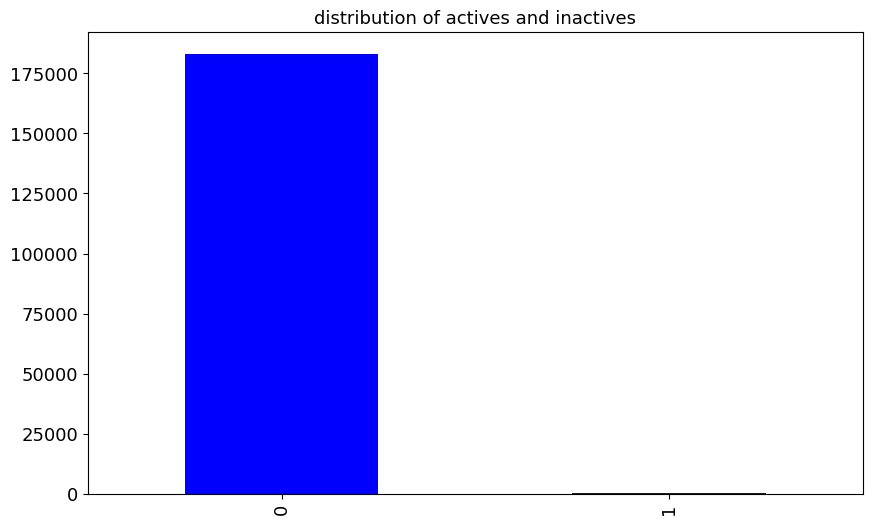

In [13]:
ax = y.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='blue')
ax.set_title('distribution of actives and inactives', fontsize=13)
ax.set_alpha(0.5)

In [14]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# normalizing data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validate = scaler.transform(X_validate)

In [16]:
over = SMOTE()
X_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)

In [17]:
y_train_resampled.value_counts()

0    128168
1    128168
Name: activity, dtype: int64

Text(0.5, 1.0, 'distribution in sampled dataset')

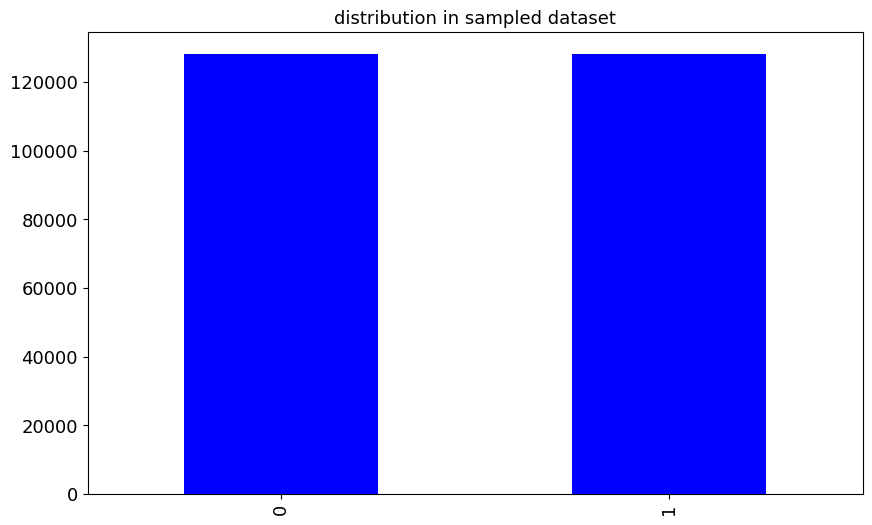

In [18]:
ax = y_train_resampled.value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='blue')
ax.set_title('distribution in sampled dataset', fontsize=13)

## training model with oversampled data

In [19]:
import tensorflow as tf

In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_validate, y_validate), epochs=10, batch_size=32)

Epoch 1/10
8011/8011 [==============================] - 41s 5ms/step - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.0255 - val_accuracy: 0.9940
Epoch 2/10
8011/8011 [==============================] - 39s 5ms/step - loss: 0.0130 - accuracy: 0.9966 - val_loss: 0.0281 - val_accuracy: 0.9953
Epoch 3/10
8011/8011 [==============================] - 36s 5ms/step - loss: 0.0092 - accuracy: 0.9976 - val_loss: 0.0255 - val_accuracy: 0.9961
Epoch 4/10
8011/8011 [==============================] - 36s 5ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0265 - val_accuracy: 0.9956
Epoch 5/10
8011/8011 [==============================] - 36s 4ms/step - loss: 0.0051 - accuracy: 0.9988 - val_loss: 0.0368 - val_accuracy: 0.9961
Epoch 6/10
8011/8011 [==============================] - 37s 5ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0349 - val_accuracy: 0.9972
Epoch 7/10
8011/8011 [==============================] - 36s 4ms/step - loss: 0.0040 - accuracy: 0.9990 - val_loss: 0.0361 - val_ac

### evaluating the model using the test data

In [21]:
# getting the test dataset
testing_data = pd.concat([actives_test, inactives_test], ignore_index=True)

In [22]:
len(testing_data)

600

In [23]:
testing_data['activity'].value_counts()

1    300
0    300
Name: activity, dtype: int64

In [24]:
testing_data.head()

,D001,D002,D003,D004,D005,D006,D007,D008,D009,D010,...,D769,D770,D771,D772,D773,D774,D775,D776,D777,activity
0,1,0,0,1,3,0,0,0,0,0,...,0,0,0,0,0,4.954,-0.280,0.231,3.149,1
1,1,0,0,2,2,0,0,0,0,0,...,0,1,0,0,1,5.285,-0.234,0.214,0.636,1
2,2,0,0,2,2,0,0,0,0,0,...,0,2,0,0,0,5.170,-0.658,0.444,3.317,1
3,2,0,0,2,2,0,0,0,0,0,...,0,0,0,0,0,5.170,-0.823,0.444,3.307,1
4,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,4.858,-0.717,0.000,1.820,1


In [25]:
testing_data_x = testing_data.drop(['activity'], axis=1)
print(len(testing_data_x))
testing_data_x = scaler.transform(testing_data_x)
testing_data_y = testing_data['activity']

600


In [26]:
model.evaluate(testing_data_x, testing_data_y, verbose=2)

19/19 - 0s - loss: 8.6587 - accuracy: 0.6867 - 101ms/epoch - 5ms/step


[8.658734321594238, 0.6866666674613953]

### evaluating model's performance with F1 score, precision, recall, etc

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [28]:
inactives_test_x = inactives_test.drop(['activity'], axis=1)
inactives_test_x = scaler.transform(inactives_test_x)
actives_test_x = actives_test.drop(['activity'], axis=1)
actives_test_x = scaler.transform(actives_test_x)

In [29]:
y_true_actives = np.array([1] * len(actives_test_x))
y_true_inactives = np.array([0] * len(inactives_test_x))
y_true = np.concatenate((y_true_actives, y_true_inactives))

There are both y_pred and y_pred_rounded because the model outputs a probability and we need to round it to get the class.


y_pred will be used to calculate the ROC curve and the AUC.


y_pred_rounded will be used to calculate the confusion matrix.

In [30]:
y_pred_actives = model.predict(actives_test_x)
y_pred_actives_rounded = (y_pred_actives > 0.5).astype(int).reshape(len(y_pred_actives, ))
y_pred_inactives = model.predict(inactives_test_x)
y_pred_inactives_rounded = (y_pred_inactives > 0.5).astype(int).reshape(len(y_pred_inactives, ))
y_pred = np.concatenate((y_pred_actives, y_pred_inactives))
y_pred_rounded = np.concatenate((y_pred_actives_rounded, y_pred_inactives_rounded))

10/10 [==============================] - 0s 3ms/step


In [31]:
accuracy = accuracy_score(y_true, y_pred_rounded)
precision = precision_score(y_true, y_pred_rounded)
recall = recall_score(y_true, y_pred_rounded)
f1 = f1_score(y_true, y_pred_rounded)

In [32]:
print("accuracy is {}".format(accuracy))
print("precision is {}".format(precision))
print("recall is {}".format(recall))
print("f1 is {}".format(f1))

accuracy is 0.6866666666666666
precision is 1.0
recall is 0.37333333333333335
f1 is 0.5436893203883496


Drawing the ROC curve to enable us to carry out threshold moving,

In [33]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)

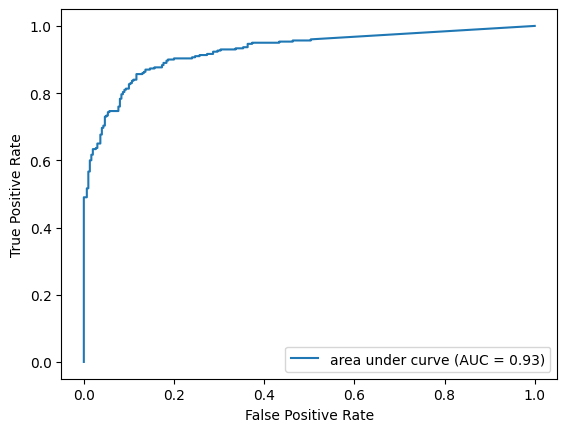

In [34]:
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='area under curve')
display.plot()
plt.show()

In [35]:
fav_thresholds = []
for i in range(len(thresholds)):
    if fpr[i] < 0.15 and tpr[i] > 0.8:
        fav_thresholds.append((i, thresholds[i], fpr[i], tpr[i]))

In [36]:
for i in fav_thresholds:
    print(i)

(42, 2.0989866e-12, 0.08666666666666667, 0.8033333333333333)
(43, 1.6003496e-12, 0.09, 0.8033333333333333)
(44, 7.076966e-13, 0.09, 0.81)
(45, 6.164298e-13, 0.09333333333333334, 0.81)
(46, 5.329426e-13, 0.09333333333333334, 0.8133333333333334)
(47, 3.7879045e-13, 0.1, 0.8133333333333334)
(48, 7.509014e-14, 0.1, 0.8266666666666667)
(49, 5.191332e-14, 0.10333333333333333, 0.8266666666666667)
(50, 4.98821e-14, 0.10333333333333333, 0.83)
(51, 3.7811026e-14, 0.10666666666666667, 0.83)
(52, 3.1656233e-14, 0.10666666666666667, 0.8366666666666667)
(53, 2.5380765e-14, 0.11, 0.8366666666666667)
(54, 2.3489852e-14, 0.11, 0.84)
(55, 1.6400748e-14, 0.11666666666666667, 0.84)
(56, 1.197446e-15, 0.11666666666666667, 0.8566666666666667)
(57, 7.9469764e-16, 0.13, 0.8566666666666667)
(58, 7.294336e-16, 0.13, 0.86)
(59, 5.421745e-16, 0.13333333333333333, 0.86)
(60, 3.7698435e-16, 0.13333333333333333, 0.8633333333333333)
(61, 2.7367695e-16, 0.13666666666666666, 0.8633333333333333)
(62, 1.9948149e-16, 0.13

In [37]:
selected_threshold = fav_thresholds[-1][1]
selected_threshold

1.0527024e-16

In [38]:
y_pred_actives_rounded2 = (y_pred_actives > selected_threshold).astype(int).reshape(len(y_pred_actives, ))
y_pred_inactives_rounded2 = (y_pred_inactives > selected_threshold).astype(int).reshape(len(y_pred_inactives, ))
y_pred_rounded2 = np.concatenate((y_pred_actives_rounded2, y_pred_inactives_rounded2))

In [39]:
accuracy = accuracy_score(y_true, y_pred_rounded2)
precision = precision_score(y_true, y_pred_rounded2)
recall = recall_score(y_true, y_pred_rounded2)
f1 = f1_score(y_true, y_pred_rounded2)

In [40]:
print("accuracy is {}".format(accuracy))
print("precision is {}".format(precision))
print("recall is {}".format(recall))
print("f1 is {}".format(f1))

accuracy is 0.8616666666666667
precision is 0.8557377049180328
recall is 0.87
f1 is 0.8628099173553719
